<a href="https://colab.research.google.com/github/ammobam/Study_DeepLearing/blob/main/210813_PyTorch_CNN_%EB%AA%A8%EB%8D%B8_%EA%B5%AC%EC%A1%B0_%EC%A0%84%EC%9D%B4%ED%95%99%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
# ** 선형회귀

## 단순선형회귀

### 클래스를 이용하지 않는 단순 선형 회귀

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [ ]:
# 데이터 생성
X_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[2], [4], [6]])

In [ ]:
# 회귀모델 생성
model = nn.Linear(1, 1)

# Optimizer 생성
optimizer = optim.SGD(model.parameters(), lr=0.01)

# 훈련
for epoch in range(3001):
    # 입력데이터로 예측
    prediction = model(X_train)
    # 손실함수 설정
    cost = F.mse_loss(prediction, y_train)

    # 이전 가중치 삭제 - 초기화
    optimizer.zero_grad()

    # 역전파
    cost.backward()

    # 가중치 업데이트
    optimizer.step()

    # 훈련 중 손실 출력
    if epoch % 100 == 0:
        print('횟수:', epoch, '/', 3000, '\t Cost:', cost.item())

횟수: 0 / 3000 	 Cost: 42.06001663208008
횟수: 100 / 3000 	 Cost: 0.03589759021997452
횟수: 200 / 3000 	 Cost: 0.02218254841864109
횟수: 300 / 3000 	 Cost: 0.013707466423511505
횟수: 400 / 3000 	 Cost: 0.008470405824482441
횟수: 500 / 3000 	 Cost: 0.005234202835708857
횟수: 600 / 3000 	 Cost: 0.003234408563002944
횟수: 700 / 3000 	 Cost: 0.0019986750558018684
횟수: 800 / 3000 	 Cost: 0.0012350640026852489
횟수: 900 / 3000 	 Cost: 0.0007631924818269908
횟수: 1000 / 3000 	 Cost: 0.0004716114199254662
횟수: 1100 / 3000 	 Cost: 0.0002914231736212969
횟수: 1200 / 3000 	 Cost: 0.00018007964536082
횟수: 1300 / 3000 	 Cost: 0.00011127773177577183
횟수: 1400 / 3000 	 Cost: 6.876316183479503e-05
횟수: 1500 / 3000 	 Cost: 4.249107951181941e-05
횟수: 1600 / 3000 	 Cost: 2.625793968036305e-05
횟수: 1700 / 3000 	 Cost: 1.6225932995439507e-05
횟수: 1800 / 3000 	 Cost: 1.0026259587903041e-05
횟수: 1900 / 3000 	 Cost: 6.1958694459463e-06
횟수: 2000 / 3000 	 Cost: 3.829128218058031e-06
횟수: 2100 / 3000 	 Cost: 2.3665336357225897e-06
횟수: 2200 / 3

In [ ]:
new_var = torch.FloatTensor([[5.0]])
pred_y = model(new_var)
print(pred_y)

tensor([[9.9994]], grad_fn=<AddmmBackward>)


In [ ]:
print(list(model.parameters()))

[Parameter containing:
tensor([[1.9998]], requires_grad=True), Parameter containing:
tensor([0.0005], requires_grad=True)]


### 동일한 모델을 클래스로 구현해보기

In [ ]:
# 상위클래스 상속 받아서 선형예측 클래스 만들기
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(1, 1)

    def forward(self, x):
        return self.linear(x)

In [ ]:
# 회귀모델 생성
model = LinearRegressionModel()

# Optimizer 생성
optimizer = optim.SGD(model.parameters(), lr=0.01)

# 훈련
for epoch in range(3001):
    # 입력데이터로 예측
    prediction = model(X_train)
    # 손실함수 설정
    cost = F.mse_loss(prediction, y_train)
    # 이전 가중치 삭제 - 초기화
    optimizer.zero_grad()
    # 역전파
    cost.backward()
    # 가중치 업데이트
    optimizer.step()
    # 훈련 중 손실 출력
    if epoch % 100 == 0:
        print('횟수:', epoch, '/', 3000, '\t Cost:', cost.item())

횟수: 0 / 3000 	 Cost: 10.038850784301758
횟수: 100 / 3000 	 Cost: 0.04490127041935921
횟수: 200 / 3000 	 Cost: 0.027746250852942467
횟수: 300 / 3000 	 Cost: 0.01714554987847805
횟수: 400 / 3000 	 Cost: 0.010594889521598816
횟수: 500 / 3000 	 Cost: 0.006546964403241873
횟수: 600 / 3000 	 Cost: 0.004045648965984583
횟수: 700 / 3000 	 Cost: 0.0024999522138386965
횟수: 800 / 3000 	 Cost: 0.0015448220074176788
횟수: 900 / 3000 	 Cost: 0.0009546063374727964
횟수: 1000 / 3000 	 Cost: 0.000589889707043767
횟수: 1100 / 3000 	 Cost: 0.000364518171409145
횟수: 1200 / 3000 	 Cost: 0.0002252522244816646
횟수: 1300 / 3000 	 Cost: 0.00013919478806201369
횟수: 1400 / 3000 	 Cost: 8.60130530782044e-05
횟수: 1500 / 3000 	 Cost: 5.314842928783037e-05
횟수: 1600 / 3000 	 Cost: 3.2843909139046445e-05
횟수: 1700 / 3000 	 Cost: 2.029518327617552e-05
횟수: 1800 / 3000 	 Cost: 1.2541851901914924e-05
횟수: 1900 / 3000 	 Cost: 7.750581971777137e-06
횟수: 2000 / 3000 	 Cost: 4.789924332726514e-06
횟수: 2100 / 3000 	 Cost: 2.960155143227894e-06
횟수: 2200 / 

## 다중 선형 회귀

In [ ]:
# 패키지 임포트
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch import nn

In [ ]:
# 데이터 가져오기
df_score = pd.read_csv('/content/drive/MyDrive/data/assets/score.csv', index_col=0)
df_score

,score,iq,academy,game,tv
name,,,,,
A,90,140,2,1,0
B,75,125,1,3,3
C,77,120,1,0,4
D,83,135,2,3,2
E,65,105,0,4,4
F,80,123,3,1,1
G,83,132,3,4,1
H,70,115,1,1,3
I,87,128,4,0,0


In [ ]:
# feature, class를 Tensor로 생성하기
X = torch.from_numpy(df_score[['iq','academy','game','tv']].values)
X = X.unsqueeze(dim=1).float()
y = torch.from_numpy(df_score['score'].values)
y = y.unsqueeze(dim=1).float()

print(X)
print(y)

tensor([[[140.,   2.,   1.,   0.]],

        [[125.,   1.,   3.,   3.]],

        [[120.,   1.,   0.,   4.]],

        [[135.,   2.,   3.,   2.]],

        [[105.,   0.,   4.,   4.]],

        [[123.,   3.,   1.,   1.]],

        [[132.,   3.,   4.,   1.]],

        [[115.,   1.,   1.,   3.]],

        [[128.,   4.,   0.,   0.]],

        [[131.,   2.,   2.,   3.]]])
tensor([[90.],
        [75.],
        [77.],
        [83.],
        [65.],
        [80.],
        [83.],
        [70.],
        [87.],
        [79.]])


In [ ]:
# 다중 선형예측 클래스 만들기
class MultivariateRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(4, 1)    # 우리가 분석하고자 하는 컬럼이 4개니까!

    def forward(self, x):
        return self.linear(x)

In [ ]:
# 회귀모델 생성
model = MultivariateRegressionModel()

# Optimizer 생성
optimizer = optim.SGD(model.parameters(), lr=0.00001)

In [ ]:
# 훈련
for epoch in range(3001):
    # 입력데이터로 예측
    prediction = model(X)
    # 손실함수 설정
    cost = F.mse_loss(prediction, y)
    # 이전 가중치 삭제 - 초기화
    optimizer.zero_grad()
    # 역전파
    cost.backward()
    # 가중치 업데이트
    optimizer.step()
    # 훈련 중 손실 출력
    if epoch % 100 == 0:
        print('횟수:', epoch, '/', 3000, '\t Cost:', cost.item())

# Cost : nan ?
## 비용함수가 적절히 설정되었나?
    ## 선형회귀에서 mae, mse 사용함. 적절함.
## 함수가 초기 점에서 움직이지 못했나?
    ## 학습률(lr)을 좁혀보자
        ## 0.1 -->  0.00001 해결!
    ## optimizer를 바꿔보자
        ## SGD --> Adam 등..

횟수: 0 / 3000 	 Cost: 10341.82421875
횟수: 100 / 3000 	 Cost: 84.01702880859375
횟수: 200 / 3000 	 Cost: 83.85169982910156
횟수: 300 / 3000 	 Cost: 83.68858337402344
횟수: 400 / 3000 	 Cost: 83.52761840820312


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: Using a target size (torch.Size([10, 1])) that is different to the input size (torch.Size([10, 1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  


횟수: 500 / 3000 	 Cost: 83.36882019042969
횟수: 600 / 3000 	 Cost: 83.21211242675781
횟수: 700 / 3000 	 Cost: 83.05746459960938
횟수: 800 / 3000 	 Cost: 82.90489959716797
횟수: 900 / 3000 	 Cost: 82.7542953491211
횟수: 1000 / 3000 	 Cost: 82.60572052001953
횟수: 1100 / 3000 	 Cost: 82.45909118652344
횟수: 1200 / 3000 	 Cost: 82.31444549560547
횟수: 1300 / 3000 	 Cost: 82.1716537475586
횟수: 1400 / 3000 	 Cost: 82.0307388305664
횟수: 1500 / 3000 	 Cost: 81.89166259765625
횟수: 1600 / 3000 	 Cost: 81.75448608398438
횟수: 1700 / 3000 	 Cost: 81.6190414428711
횟수: 1800 / 3000 	 Cost: 81.48539733886719
횟수: 1900 / 3000 	 Cost: 81.35347747802734
횟수: 2000 / 3000 	 Cost: 81.22331237792969
횟수: 2100 / 3000 	 Cost: 81.09484100341797
횟수: 2200 / 3000 	 Cost: 80.9680404663086
횟수: 2300 / 3000 	 Cost: 80.8428955078125
횟수: 2400 / 3000 	 Cost: 80.7193832397461
횟수: 2500 / 3000 	 Cost: 80.59744262695312
횟수: 2600 / 3000 	 Cost: 80.47714233398438
횟수: 2700 / 3000 	 Cost: 80.35833740234375
횟수: 2800 / 3000 	 Cost: 80.24112701416016
횟수: 

In [ ]:
# 모델 테스트 해보기
new_var = torch.FloatTensor([[140, 2, 1, 1]])
pred_y = model(new_var)
print("예측값:", pred_y)
print(list(model.parameters()))

예측값: tensor([[86.6326]], grad_fn=<AddmmBackward>)
[Parameter containing:
tensor([[ 0.6187, -0.4875,  0.4093,  0.4374]], requires_grad=True), Parameter containing:
tensor([0.1383], requires_grad=True)]


# ** CNN
- CNN은 하나의 피처를 독립적으로 보지 않고 '주위 피처와 함께' 학습시키는 신경망

- 이미지 처리에 CNN을 이용하는 이유?
    - 이미지는 하나의 차원으로 표현되지 않음
    - 이미지는 지역 정보를 학습할 수 있는 신경망이 필요함
    - 지역 정보 : 여러 개의 피처가 합쳐진 표현
    - 즉, feature가 독립적이지 않아서 머신러닝 수행이 어려움

- CNN의 구조
    - 1. Convolution Layer : Region Feature를 만들어내는 층
    - 2. Pooling Layer : Feature Dimention을 위한 층
    - 3. Fully Connected Layer : 실제 출력층


- DNN(MLP)와 CNN의 이미지 처리 방법
    - 이미지의 feature를 추출하는 방법에 차이가 있음
    - DNN(MLP) : 이미지의 픽셀값을 input으로 바로 사용함
    - CNN : Region Feature를 Conv층과 Pooling층을 이용해 추출하여 MLP의 input으로 이용함





1. Convolution Layer
       - Receptive Field를 정의해서 입력층의 이미지의 feature를 추출하는 역할을 수행하는 layer

        - 구현방법
            - 이미지 전체를 Receptive Field 영역 단위로 stride만큼 이동하며 순회하면서 연산을 수행함
            - Receptive Field : 이미지를 분할한 데이터 영역(크기)
            - stride : 순회하는 단위

        - padding
            - padding : 가장자리 외곽에 0인 영역을 추가
            - 가장자리 부분은 중앙보다 연산 횟수가 적게 됨
            - 가장자리가 중요할 때는 padding 처리하여 다른 셀과 연산 횟수가 동일하도록 할 수 있음

        - weight sharing
            - 각 Receptive Field 별로 가중치를 소유하면 학습할 파라미터가 너무 많아짐
            - 가중치를 Receptive Field끼리 공유하여 파라미터 수를 줄여줌
    



2. Pooling Layer
    - feature의 사이즈를 줄이기 위해서 여러 개의 feature 값을 하나로 묶어주는 작업
    - 보통 평균이나 최댓값을 이용함
    - 일반적으로 Conv 층과 Pooling 층을 겹쳐 쌓음

3. Fully Connected Layer : 실제 출력층
    - Pooling Layer에서 나온 feature를 Flatten 시킨 데이터를
    - MLP(다중퍼셉트론)의 input으로 두고 학습을 진행함


## CNN을 이용한 이미지 데이터 분류 실습
- 데이터셋 : CIFAR-10 이미지 데이터
- 작업내용 : MLP를 이용한 분류
- 과정
	- 모듈 임포트
	- 장비 확인- GPU 사용 여부
	- 데이터 다운로드
	- 데이터 확인
	- MLP 모델 설계
	- Optimizer, Objective Function 설계
	- 성능 확인하는 함수 설계
	- 검증 함수 설계
	- 학습 수행

### 모듈 import

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import matplotlib.pyplot as plt
import numpy as np

from torchvision import transforms, datasets

### 장비 확인 - GPU 사용 여부

In [ ]:
# Colab GPU를 켜고 확인해보면 True가 나옴
print("GPU 사용가능 여부:", torch.cuda.is_available())

# 조건문으로 확인 가능
if torch.cuda.is_available():
    DEVICE = torch.device('cuda')
else:
    DEVICE = torch.device('CPU')

print('torch version:', torch.__version__)
print('DEVICE:', DEVICE)

GPU 사용가능 여부: True
torch version: 1.9.0+cu102
DEVICE: cuda


### 데이터 다운로드
- 데이터셋 : CIFAR-10 이미지 데이터

In [ ]:
# 데이터 다운로드
train_dataset = datasets.CIFAR10(root='/content/drive/MyDrive/data/CIFAR10',
                                 train = True, download=True,
                                 transform = transforms.ToTensor())
test_dataset = datasets.CIFAR10(root='/content/drive/MyDrive/data/CIFAR10',
                                 train = False, download=True,
                                 transform = transforms.ToTensor())


Extracting /content/drive/MyDrive/data/CIFAR10/cifar-10-python.tar.gz to /content/drive/MyDrive/data/CIFAR10
Files already downloaded and verified


In [ ]:
# 확인
type(test_dataset)
#dir(test_dataset)

torchvision.datasets.cifar.CIFAR10

In [ ]:
# 데이터 변환
BATCH_SIZE = 32

train_loader = torch.utils.data.DataLoader(dataset = train_dataset,
                                            batch_size = BATCH_SIZE,
                                            shuffle = True)

test_loader = torch.utils.data.DataLoader(dataset = test_dataset,
                                            batch_size = BATCH_SIZE,
                                            shuffle = True)

### 데이터 확인

In [ ]:
# 데이터 확인
type(train_loader)
dir(train_loader) # '__iter__'

for (X_train, y_train) in train_loader:
    print(X_train.size())    # torch.Size([32, 3, 32, 32]) : 배치사이즈32, 채널수3, 가로32, 세로32
    print(y_train.size())    # torch.Size([32])
    break # 1번만 돌고 멈추게

# torch.Size([32, 3, 32, 32])
# 배치사이즈, 채널수, 가로, 세로

torch.Size([32, 3, 32, 32])
torch.Size([32])


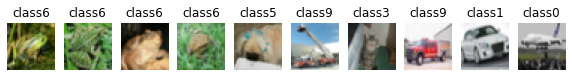

In [ ]:
# 이미지 꺼내보기
pltsize = 1
plt.figure(figsize=(10*pltsize, pltsize))

for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.axis('off')
    plt.imshow(np.transpose(X_train[i], (1, 2, 0)))
    plt.title('class' + str(y_train[i].item()))

### ** MLP 모델 설계

In [ ]:
# 모델 생성 클래스
class ModelMaker(nn.Module):
    def __init__(self):
        super(ModelMaker,self).__init__()
        self.fc1 = nn.Linear(32*32*3, 512) # 가로*세로*채널
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 10)     # 클래스 10개로 분류할 것
        # 512랑 256 개수 맞춰주는 건 알겠는데 왜 하필 저 값일까?
        # 나는.. 256이랑 128로 해봐야지

    def forward(self, x):
        x = x.view(-1, 32*32*3)
        
        x = self.fc1(x)
        x = F.relu(x)

        x = self.fc2(x)
        x = F.relu(x)

        x = self.fc3(x)
        x = F.log_softmax(x, dim=1)
        return x

In [ ]:
# 모델 생성
model = ModelMaker().to(DEVICE)

### Optimizer, Objective Function(손실함수) 설계

In [ ]:
# Optimizer 설정
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)

# Objective Function
criterion = nn.CrossEntropyLoss()
## CrossEntropyLoss
    ## 다중분류를 위한 함수
    ## nn.LogSoftmax와 nn.NLLLoss의 연산의 조합

### 성능 확인하는 함수 설계

In [ ]:
def train(model, train_loader, optimizer, log_interval):
    # 모델 훈련 시작
    model.train()
    # 훈련 데이터의 배치번호, 이미지, 레이블을 순회함
    for batch_idx, (image, label) in enumerate(train_loader):
        # image, label을 DEVICE에 할당
        image = image.to(DEVICE)
        label = label.to(DEVICE)
        # optimizer 초기화
        optimizer.zero_grad()
        # image로 예측
        output = model(image)
        # 손실 계산
        loss = criterion(output, label)
        # 손실 역전파
        loss.backward()

        # 파라미터 값(weight)을 업데이트
        ## weight를 업데이트 하고 사용한 optimizer는 None으로 초기화 하는 것!
        ## loss가 적을 때의 weight만 업데이트하고 다시 for문
        optimizer.step()

        # 출력
        if batch_idx % log_interval == 0:
            print('Train Epoch:{}[{}/{} {:.0f}%]\tTrain Loss:{:.6f}'.
                  format(epoch, batch_idx*len(image), len(train_loader.dataset), 100*batch_idx/len(train_loader), loss.item()))

### 검증 함수 설계

In [ ]:
def evaluate(model, test_loader):
    # 모델 검증 시작
    model.eval()
    # 누적 손실을 계산하기 위한 변수
    test_loss = 0
    # 정확히 분류된 데이터의 개수를 세는 변수
    correct_cnt = 0

    # 훈련 데이터의 배치번호, 이미지, 레이블을 순회함
    with torch.no_grad():
        for image, label in test_loader:
            # image, label을 DEVICE에 할당
            image = image.to(DEVICE)
            label = label.to(DEVICE)

            # image로 예측
            output = model(image)
                ## output : 어떤 클래스로 분류할기 확률을 리턴한 텐서

            # 누적 손실 계산
            test_loss += criterion(output, label)

            # 정답의 개수를 계산
            prediction = output.max(1, keepdim=True)[1]
                ## ouput 텐서에서 가장 큰 값(확률)의 클래스를 리턴함
                ## keepdim : 차원도 같이 리턴하는 옵션
            correct_cnt += prediction.eq(label.view_as(prediction)).sum().item()
                ## 결과적으로, 예측값과 레이블값이 동일하면 1 더해주는 코드임
                ## .view_as : label은 텐서가 아니라서 prediction과 같은 타입으로 바꿔줌  #??정확한 기능 찾아보기
                ## .eq: prediction과, label의 값이 같은지 비교
                ## .sum().item() : True일 때의 개수를 리턴함                
        
        # 손실의 평균 구하기
        test_loss /= len(test_loader.dataset)    # /= : 나눠서 다시 왼쪽 변수에 할당
        # 정확도 구하기
        test_accuracy = 100 * correct_cnt / len(test_loader.dataset)
        return test_loss, test_accuracy

### 학습 수행

In [ ]:
# 정의한 함수 불러와서 모델 훈련하기
EPOCHS = 10

for epoch in range(1, EPOCHS+1):
    # 훈련
    train(model , train_loader, optimizer, log_interval=200)
    # 검증해서 loss, accuracy 받아오기
    test_loss, test_accuracy = evaluate(model, test_loader)
    # 출력
    print('\n[EPOCH:{}]\ \tTest Loss : {:.4f} \tTest Accuracy:{:.2f}%\n'.format(epoch, test_loss, test_accuracy))

# [EPOCH:10]\ 	Test Loss : 0.0466 	Test Accuracy:46.95%

Train Epoch:1[0/50000 0%]	Train Loss:2.304224
Train Epoch:1[6400/50000 13%]	Train Loss:2.277791
Train Epoch:1[12800/50000 26%]	Train Loss:1.739310
Train Epoch:1[19200/50000 38%]	Train Loss:1.992066
Train Epoch:1[25600/50000 51%]	Train Loss:1.735134
Train Epoch:1[32000/50000 64%]	Train Loss:1.906416
Train Epoch:1[38400/50000 77%]	Train Loss:1.831388
Train Epoch:1[44800/50000 90%]	Train Loss:1.770254

[EPOCH:1]\ 	Test Loss : 0.0532 	Test Accuracy:38.47%

Train Epoch:2[0/50000 0%]	Train Loss:1.792498
Train Epoch:2[6400/50000 13%]	Train Loss:1.985380
Train Epoch:2[12800/50000 26%]	Train Loss:1.671002
Train Epoch:2[19200/50000 38%]	Train Loss:1.562388
Train Epoch:2[25600/50000 51%]	Train Loss:1.617065
Train Epoch:2[32000/50000 64%]	Train Loss:1.744818
Train Epoch:2[38400/50000 77%]	Train Loss:1.605027
Train Epoch:2[44800/50000 90%]	Train Loss:1.681364

[EPOCH:2]\ 	Test Loss : 0.0494 	Test Accuracy:43.94%

Train Epoch:3[0/50000 0%]	Train Loss:1.788501
Train Epoch:3[6400/50000 13%]	Train Loss

In [ ]:
# 모델 훈련한 결과물 시각화하여 출력해보자 ~~~~~~~~~~~~

### **CNN 모델 적용

In [ ]:
# CNN 모델 설계
# 모델 생성 클래스
class CNN(nn.Module):
    def __init__(self):
        super(CNN,self).__init__()

        # Conv 층
        # in_channels : 입력받는 채널 수
        # out_channels : Conv 연산 결과 만들어지는 Feature Map의 수
        # kernrl_size : Filter의 크기
        self.conv1 = nn.Conv2d(in_channels = 3, out_channels = 8, kernel_size = 3, padding = 1)
        self.conv2 = nn.Conv2d(in_channels = 8, out_channels = 16, kernel_size = 3, padding = 1)

        # Pooling 층
        # 2*2 단위로 영역을 도출하여 대표값을 최대값으로 설정
        # 영역 이동 간격은 stride
        self.pool = nn.MaxPool2d(kernel_size = 2, stride = 2)

        # MLP 층
        self.fc1 = nn.Linear(8*8*16, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 10)

    def forward(self, x):

        x = self.conv1(x)
        x = F.relu(x)
        x = self.pool(x)

        x = self.conv2(x)
        x = F.relu(x)
        x = self.pool(x)

        x = x.view(-1, 8*8*16)

        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        x = F.log_softmax(x, dim=1)

        return x

In [ ]:
model = CNN().to(DEVICE)

In [ ]:
# 정의한 함수 불러와서 모델 훈련하기
EPOCHS = 10

for epoch in range(1, EPOCHS+1):
    # 훈련
    train(model , train_loader, optimizer, log_interval=200)
    # 검증해서 loss, accuracy 받아오기
    test_loss, test_accuracy = evaluate(model, test_loader)
    # 출력
    print('\n[EPOCH:{}]\ \tTest Loss : {:.4f} \tTest Accuracy:{:.2f}%\n'.format(epoch, test_loss, test_accuracy))

# MLP : [EPOCH:10]\ 	Test Loss : 0.0466 	Test Accuracy:46.95%
# CNN : [EPOCH:10]\ 	Test Loss : 0.0722 	Test Accuracy:10.00%   ...?? 이게 아닌데 왜 더 나빠짐

Train Epoch:1[0/50000 0%]	Train Loss:2.301139
Train Epoch:1[6400/50000 13%]	Train Loss:2.332168
Train Epoch:1[12800/50000 26%]	Train Loss:2.306756
Train Epoch:1[19200/50000 38%]	Train Loss:2.313448
Train Epoch:1[25600/50000 51%]	Train Loss:2.288547
Train Epoch:1[32000/50000 64%]	Train Loss:2.330435
Train Epoch:1[38400/50000 77%]	Train Loss:2.276727
Train Epoch:1[44800/50000 90%]	Train Loss:2.314458

[EPOCH:1]\ 	Test Loss : 0.0723 	Test Accuracy:10.00%

Train Epoch:2[0/50000 0%]	Train Loss:2.304677
Train Epoch:2[6400/50000 13%]	Train Loss:2.280938
Train Epoch:2[12800/50000 26%]	Train Loss:2.314605
Train Epoch:2[19200/50000 38%]	Train Loss:2.304981
Train Epoch:2[25600/50000 51%]	Train Loss:2.294878
Train Epoch:2[32000/50000 64%]	Train Loss:2.298915
Train Epoch:2[38400/50000 77%]	Train Loss:2.321936
Train Epoch:2[44800/50000 90%]	Train Loss:2.319889

[EPOCH:2]\ 	Test Loss : 0.0723 	Test Accuracy:10.00%

Train Epoch:3[0/50000 0%]	Train Loss:2.311503
Train Epoch:3[6400/50000 13%]	Train Loss

## 모델 성능 개선 방법

### Data Augumentation
- 데이터 원본에 변형을 가하여 학습하는 방법
- 학습용 데이터가 너무 적을 때 발생하는 문제를 해결하기 위해 이용함
- CNN 성능이 소폭 상승한다고 알려져 있음

- 종류
    - 참고링크 : https://pytorch.org/vision/stable/transforms.html
    - Flip, Rotation, Crop, Scaling
    - Cutout : 이미지의 일정 부분을 검정색으로 칠하는 것. 일종의 Dropout.
    - CutMix
        - 2개의 이미지를 합침
	    - Label을 학습시킬 때 각각의 이미지가 차지하는 비율을 조절하여 학습

In [ ]:
# 데이터 다운로드
# Data Augumentation 할 때는 그에 맞는 transform 옵션을 주고 다운로드함
# RandomHorizontalFlip, ToTensor, Normalize((평균), (표준편차))
train_dataset = datasets.CIFAR10(root='/content/drive/MyDrive/data/CIFAR10',
                                 train = True, download=True,
                                 transform = transforms.Compose([
                                                                 transforms.RandomHorizontalFlip(),
                                                                 transforms.ToTensor(),
                                                                 transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
                                 ]))
test_dataset = datasets.CIFAR10(root='/content/drive/MyDrive/data/CIFAR10',
                                 train = False, download=True,
                                 transform = transforms.Compose([
                                                                 transforms.RandomHorizontalFlip(),
                                                                 transforms.ToTensor(),
                                                                 transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
                                 ]))

Files already downloaded and verified
Files already downloaded and verified


In [ ]:
# 데이터 변환
BATCH_SIZE = 32

train_loader = torch.utils.data.DataLoader(dataset = train_dataset,
                                            batch_size = BATCH_SIZE,
                                            shuffle = True)

test_loader = torch.utils.data.DataLoader(dataset = test_dataset,
                                            batch_size = BATCH_SIZE,
                                            shuffle = True)

In [ ]:
# 데이터 확인
type(train_loader)
dir(train_loader) # '__iter__'

for (X_train, y_train) in train_loader:
    print(X_train.size())    # torch.Size([32, 3, 32, 32]) : 배치사이즈32, 채널수3, 가로32, 세로32
    print(y_train.size())    # torch.Size([32])
    break # 1번만 돌고 멈추게

# torch.Size([32, 3, 32, 32])
# 배치사이즈, 채널수, 가로, 세로

torch.Size([32, 3, 32, 32])
torch.Size([32])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

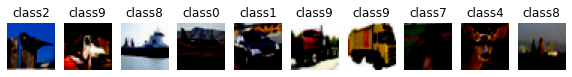

In [ ]:
# 이미지 꺼내보기
pltsize = 1
plt.figure(figsize=(10*pltsize, pltsize))

for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.axis('off')
    plt.imshow(np.transpose(X_train[i], (1, 2, 0)))
    plt.title('class' + str(y_train[i].item()))

### 데이터 개수 늘리기

In [ ]:
# 데이터 타입 알아보기
print("train_dataset 타입:", type(train_dataset))
print(".data 타입:",type(train_dataset.data)) # 데이터가 배열로 바뀜!
print("훈련 데이터 개수:",train_dataset.data.shape)
print(".targets 타입:",type(train_dataset.targets)) # 데이터가 리스트!
print("레이블 개수:",len(train_dataset.targets))

# 데이터 증식
print("===데이터 증식 수행===")
## ndarray 세로로 합치기
train_dataset.data= np.r_[train_dataset.data, train_dataset.data]
print("훈련 데이터 개수:",train_dataset.data.shape)

## list 합치기
train_dataset.targets = train_dataset.targets + train_dataset.targets
print("레이블 개수:",len(train_dataset.targets))

train_dataset 타입: <class 'torchvision.datasets.cifar.CIFAR10'>
.data 타입: <class 'numpy.ndarray'>
훈련 데이터 개수: (50000, 32, 32, 3)
.targets 타입: <class 'list'>
레이블 개수: 50000
===데이터 증식 수행===
훈련 데이터 개수: (100000, 32, 32, 3)
레이블 개수: 100000


In [ ]:
model = CNN().to(DEVICE)

In [ ]:
# 정의한 함수 불러와서 모델 훈련하기
EPOCHS = 10

for epoch in range(1, EPOCHS+1):
    # 훈련
    train(model , train_loader, optimizer, log_interval=200)
    # 검증해서 loss, accuracy 받아오기
    test_loss, test_accuracy = evaluate(model, test_loader)
    # 출력
    print('\n[EPOCH:{}]\ \tTest Loss : {:.4f} \tTest Accuracy:{:.2f}%\n'.format(epoch, test_loss, test_accuracy))

# MLP : [EPOCH:10]\ 	Test Loss : 0.0466 	Test Accuracy:46.95%
# CNN : [EPOCH:10]\ 	Test Loss : 0.0722 	Test Accuracy:10.00%   ...? 이게 아닌데 왜 더 나빠짐

Train Epoch:1[0/50000 0%]	Train Loss:2.291794
Train Epoch:1[6400/50000 13%]	Train Loss:2.318349
Train Epoch:1[12800/50000 26%]	Train Loss:2.318029
Train Epoch:1[19200/50000 38%]	Train Loss:2.299762
Train Epoch:1[25600/50000 51%]	Train Loss:2.292839
Train Epoch:1[32000/50000 64%]	Train Loss:2.291716
Train Epoch:1[38400/50000 77%]	Train Loss:2.334305
Train Epoch:1[44800/50000 90%]	Train Loss:2.334122

[EPOCH:1]\ 	Test Loss : 0.0723 	Test Accuracy:10.00%

Train Epoch:2[0/50000 0%]	Train Loss:2.307917
Train Epoch:2[6400/50000 13%]	Train Loss:2.331467
Train Epoch:2[12800/50000 26%]	Train Loss:2.288650
Train Epoch:2[19200/50000 38%]	Train Loss:2.346956
Train Epoch:2[25600/50000 51%]	Train Loss:2.313004
Train Epoch:2[32000/50000 64%]	Train Loss:2.295056
Train Epoch:2[38400/50000 77%]	Train Loss:2.292354
Train Epoch:2[44800/50000 90%]	Train Loss:2.310888

[EPOCH:2]\ 	Test Loss : 0.0723 	Test Accuracy:10.00%

Train Epoch:3[0/50000 0%]	Train Loss:2.290299
Train Epoch:3[6400/50000 13%]	Train Loss

### 전이학습
- Transfer Learning (전이학습)

- 미리 학습해놓은 딥러닝 모델로 재학습(Fine Tuning)하는 방법
    - Pre-Trained Model을 가져옴
    - 완전연결층(출력층) 전 네트워크의 가중치를 가져오고,
    - 완전연결층을 설계(디자인)해서 사용함


- 성능
    - 전이학습을 하는 경우 모델의 완전연결층 부분 가중치만 새로 학습 진행함
    - Conv층은 가중치 그대로 씀
    - 일반적으로 소량의 데이터로 딥러닝 수행하는 것보다는 전이학습을 이용하는 경우 성능이 좋음

- 참고링크
    - 전이학습 모델 : https://pytorch.org/vision/stable/models.html
    - ResNet : https://arxiv.org/abs/1512.03385



#### 전이학습 모델 가져오기

In [ ]:
# ResNet 모델 가져오기
from torchvision import models

# pretrained = False : 사전훈련된 파라미터는 수정하지 않음
# 보통은 가져오는 게 좋음
model = models.resnet34(pretrained = False)

num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 10)
model = model.to(DEVICE)

In [ ]:
# 모델 훈련
EPOCHS = 10

for epoch in range(1, EPOCHS+1):
    # 훈련
    train(model , train_loader, optimizer, log_interval=200)
    # 검증해서 loss, accuracy 받아오기
    test_loss, test_accuracy = evaluate(model, test_loader)
    # 출력
    print('\n[EPOCH:{}]\ \tTest Loss : {:.4f} \tTest Accuracy:{:.2f}%\n'.format(epoch, test_loss, test_accuracy))

# [EPOCH:10]\ 	Test Loss : 0.0845 	Test Accuracy:9.36%

Train Epoch:1[0/50000 0%]	Train Loss:2.528564
Train Epoch:1[6400/50000 13%]	Train Loss:2.863471
Train Epoch:1[12800/50000 26%]	Train Loss:2.725037
Train Epoch:1[19200/50000 38%]	Train Loss:2.656374
Train Epoch:1[25600/50000 51%]	Train Loss:2.706841
Train Epoch:1[32000/50000 64%]	Train Loss:2.782195
Train Epoch:1[38400/50000 77%]	Train Loss:2.615225
Train Epoch:1[44800/50000 90%]	Train Loss:2.690735

[EPOCH:1]\ 	Test Loss : 0.0840 	Test Accuracy:9.78%

Train Epoch:2[0/50000 0%]	Train Loss:2.862792
Train Epoch:2[6400/50000 13%]	Train Loss:2.636288
Train Epoch:2[12800/50000 26%]	Train Loss:2.629121
Train Epoch:2[19200/50000 38%]	Train Loss:2.834544
Train Epoch:2[25600/50000 51%]	Train Loss:2.677924
Train Epoch:2[32000/50000 64%]	Train Loss:2.996179
Train Epoch:2[38400/50000 77%]	Train Loss:2.825035
Train Epoch:2[44800/50000 90%]	Train Loss:2.780513

[EPOCH:2]\ 	Test Loss : 0.0834 	Test Accuracy:9.68%

Train Epoch:3[0/50000 0%]	Train Loss:2.445460
Train Epoch:3[6400/50000 13%]	Train Loss:2

#### 모델 Fine Tuning
- Fine Tuning : 사전훈련된 파라미터를 변경하도록 설정

In [ ]:
# ResNet 모델 가져오기
from torchvision import models

# 가중치 가져오기
model = models.resnet34(pretrained = True)

# 
for param in model.parameters():
    param.requires_grad = False

num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 10)
model = model.to(DEVICE)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


In [ ]:
# 모델 훈련
EPOCHS = 10

for epoch in range(1, EPOCHS+1):
    # 훈련
    train(model , train_loader, optimizer, log_interval=200)
    # 검증해서 loss, accuracy 받아오기
    test_loss, test_accuracy = evaluate(model, test_loader)
    # 출력
    print('\n[EPOCH:{}]\ \tTest Loss : {:.4f} \tTest Accuracy:{:.2f}%\n'.format(epoch, test_loss, test_accuracy))



Train Epoch:1[0/50000 0%]	Train Loss:2.491946
Train Epoch:1[6400/50000 13%]	Train Loss:2.741378
Train Epoch:1[12800/50000 26%]	Train Loss:2.715391
Train Epoch:1[19200/50000 38%]	Train Loss:2.335533
Train Epoch:1[25600/50000 51%]	Train Loss:2.442797
Train Epoch:1[32000/50000 64%]	Train Loss:2.631629
Train Epoch:1[38400/50000 77%]	Train Loss:2.495246
Train Epoch:1[44800/50000 90%]	Train Loss:2.804687

[EPOCH:1]\ 	Test Loss : 0.0819 	Test Accuracy:10.44%

Train Epoch:2[0/50000 0%]	Train Loss:2.859910
Train Epoch:2[6400/50000 13%]	Train Loss:2.572037
Train Epoch:2[12800/50000 26%]	Train Loss:2.427328
Train Epoch:2[19200/50000 38%]	Train Loss:2.513011
Train Epoch:2[25600/50000 51%]	Train Loss:2.556147
Train Epoch:2[32000/50000 64%]	Train Loss:2.509692
Train Epoch:2[38400/50000 77%]	Train Loss:2.397432
Train Epoch:2[44800/50000 90%]	Train Loss:2.649000

[EPOCH:2]\ 	Test Loss : 0.0826 	Test Accuracy:10.51%

Train Epoch:3[0/50000 0%]	Train Loss:2.520699
Train Epoch:3[6400/50000 13%]	Train Loss